In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv('D:/DSE/Capstone Project/DataCo/DataCoSupplyChainDataset.csv', encoding='latin')

In [4]:
df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  Customer Country Customer Email Customer Fname  Customer Id Customer Lname  \
0      Puerto Rico      XXXXXXXXX          Cally        20755       Holloway   
1      Puerto Rico      XXXXXXXXX          Irene        19492           Luna   
2          EE. UU.      XXXXXXXXX        Gillian        19491      Maldonado   
3          EE. UU.      XXXXXXXXX           Tana        19490           Tate   
4      Puerto Rico      XXXXXXXXX           Orli        19489      Hendricks   

  Customer Password Customer Segment Customer State           Customer Street  \
0         XXXXXXXXX         Consumer             PR  5365 Noble Nectar Island   
1         XXXXXXXXX         Consumer             PR          2679 Rustic Loop   
2         XXXXXXXXX         Consumer             CA      8510 Round Bear Gate   
3         XXXXXXXXX      Home Office             CA           3200 Amber Bend   
4         XXXXXXXXX        Corporate             PR  8671 Iron Anchor Corners   

   Customer Zipcode  Department Id Department Name   Latitude   Longitude  \
0             725.0              2         Fitness  18.251453  -66.037056   
1             725.0              2         Fitness  18.279451  -66.037064   
2           95125.0              2         Fitness  37.292233 -121.881279   
3           90027.0              2         Fitness  34.125946 -118.291016   
4             725.0              2         Fitness  18.253769  -66.037048   

         Market  Order City Order Country  Order Customer Id  \
0  Pacific Asia      Bekasi     Indonesia              20755   
1  Pacific Asia     Bikaner         India              19492   
2  Pacific Asia     Bikaner         India              19491   
3  Pacific Asia  Townsville     Australia              19490   
4  Pacific Asia  Townsville     Australia              19489   

  order date (DateOrders)  Order Id  Order Item Cardprod Id  \
0         1/31/2018 22:56     77202                    1360   
1         1/13/2018 12:27     75939                    1360   
2         1/13/2018 12:06     75938                    1360   
3         1/13/2018 11:45     75937                    1360   
4         1/13/2018 11:24     75936                    1360   

   Order Item Discount  Order Item Discount Rate  Order Item Id  \
0            13.110000                      0.04         180517   
1            16.389999                      0.05         179254   
2            18.030001                      0.06         179253   
3            22.940001                      0.07         179252   
4            29.500000                      0.09         179251   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75             

In [5]:
df.shape

(180519, 53)

# Checking Missing Values

In [6]:
Total = df.isnull().sum().sort_values(ascending=False)
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
Product Description            180519                    100.000000
Order Zipcode                  155679                     86.239676
Customer Lname                      8                      0.004432
Customer Zipcode                    3                      0.001662
Type                                0                      0.000000
Order Profit Per Order              0                      0.000000
Order Item Cardprod Id              0                      0.000000
Order Item Discount                 0                      0.000000
Order Item Discount Rate            0                      0.000000
Order Item Id                       0                      0.000000
Order Item Product Price            0                      0.000000
Order Item Profit Ratio             0                      0.000000
Order Item Quantity                 0                      0.000000
Sales                               0                      0.000000
Order Item Total                    0                      0.000000
Order Region                        0                      0.000000
order date (DateOrders)             0                      0.000000
Order State                         0                      0.000000
Order Status                        0                      0.000000
Product Card Id                     0                      0.000000
Product Category Id                 0                      0.000000
Product Image                       0                      0.000000
Product Name                        0                      0.000000
Product Price                       0                      0.000000
Product Status                      0                      0.000000
shipping date (DateOrders)          0                      0.000000
Order Id                            0                      0.000000
Order Country                       0                      0.000000
Order Customer Id                   0                      0.000000
Customer Fname                      0                      0.000000
Days for shipment (scheduled)       0                      0.000000
Benefit per order                   0                      0.000000
Sales per customer                  0                      0.000000
Delivery Status                     0                      0.000000
Late_delivery_risk                  0                      0.000000
Category Id                         0                      0.000000
Category Name                       0                      0.000000
Customer City                       0                      0.000000
Customer Country                    0                      0.000000
Customer Email                      0                      0.000000
Customer Id                         0                      0.000000
Days for shipping (real)            0                      0.000000
Customer Password                   0                      0.000000
Customer Segment                    0                      0.000000
Customer State                      0                      0.000000
Customer Street                     0                      0.000000
Department Id                       0                      0.000000
Department Name                     0                      0.000000
Latitude                            0                      0.000000
Longitude                           0                      0.000000
Market                              0                      0.000000
Order City                          0                      0.000000
Shipping Mode                       0                      0.000000

In [7]:
missing_data[missing_data['Percentage of Missing Values']>0]

Total  Percentage of Missing Values
Product Description  180519                    100.000000
Order Zipcode        155679                     86.239676
Customer Lname            8                      0.004432
Customer Zipcode          3                      0.001662

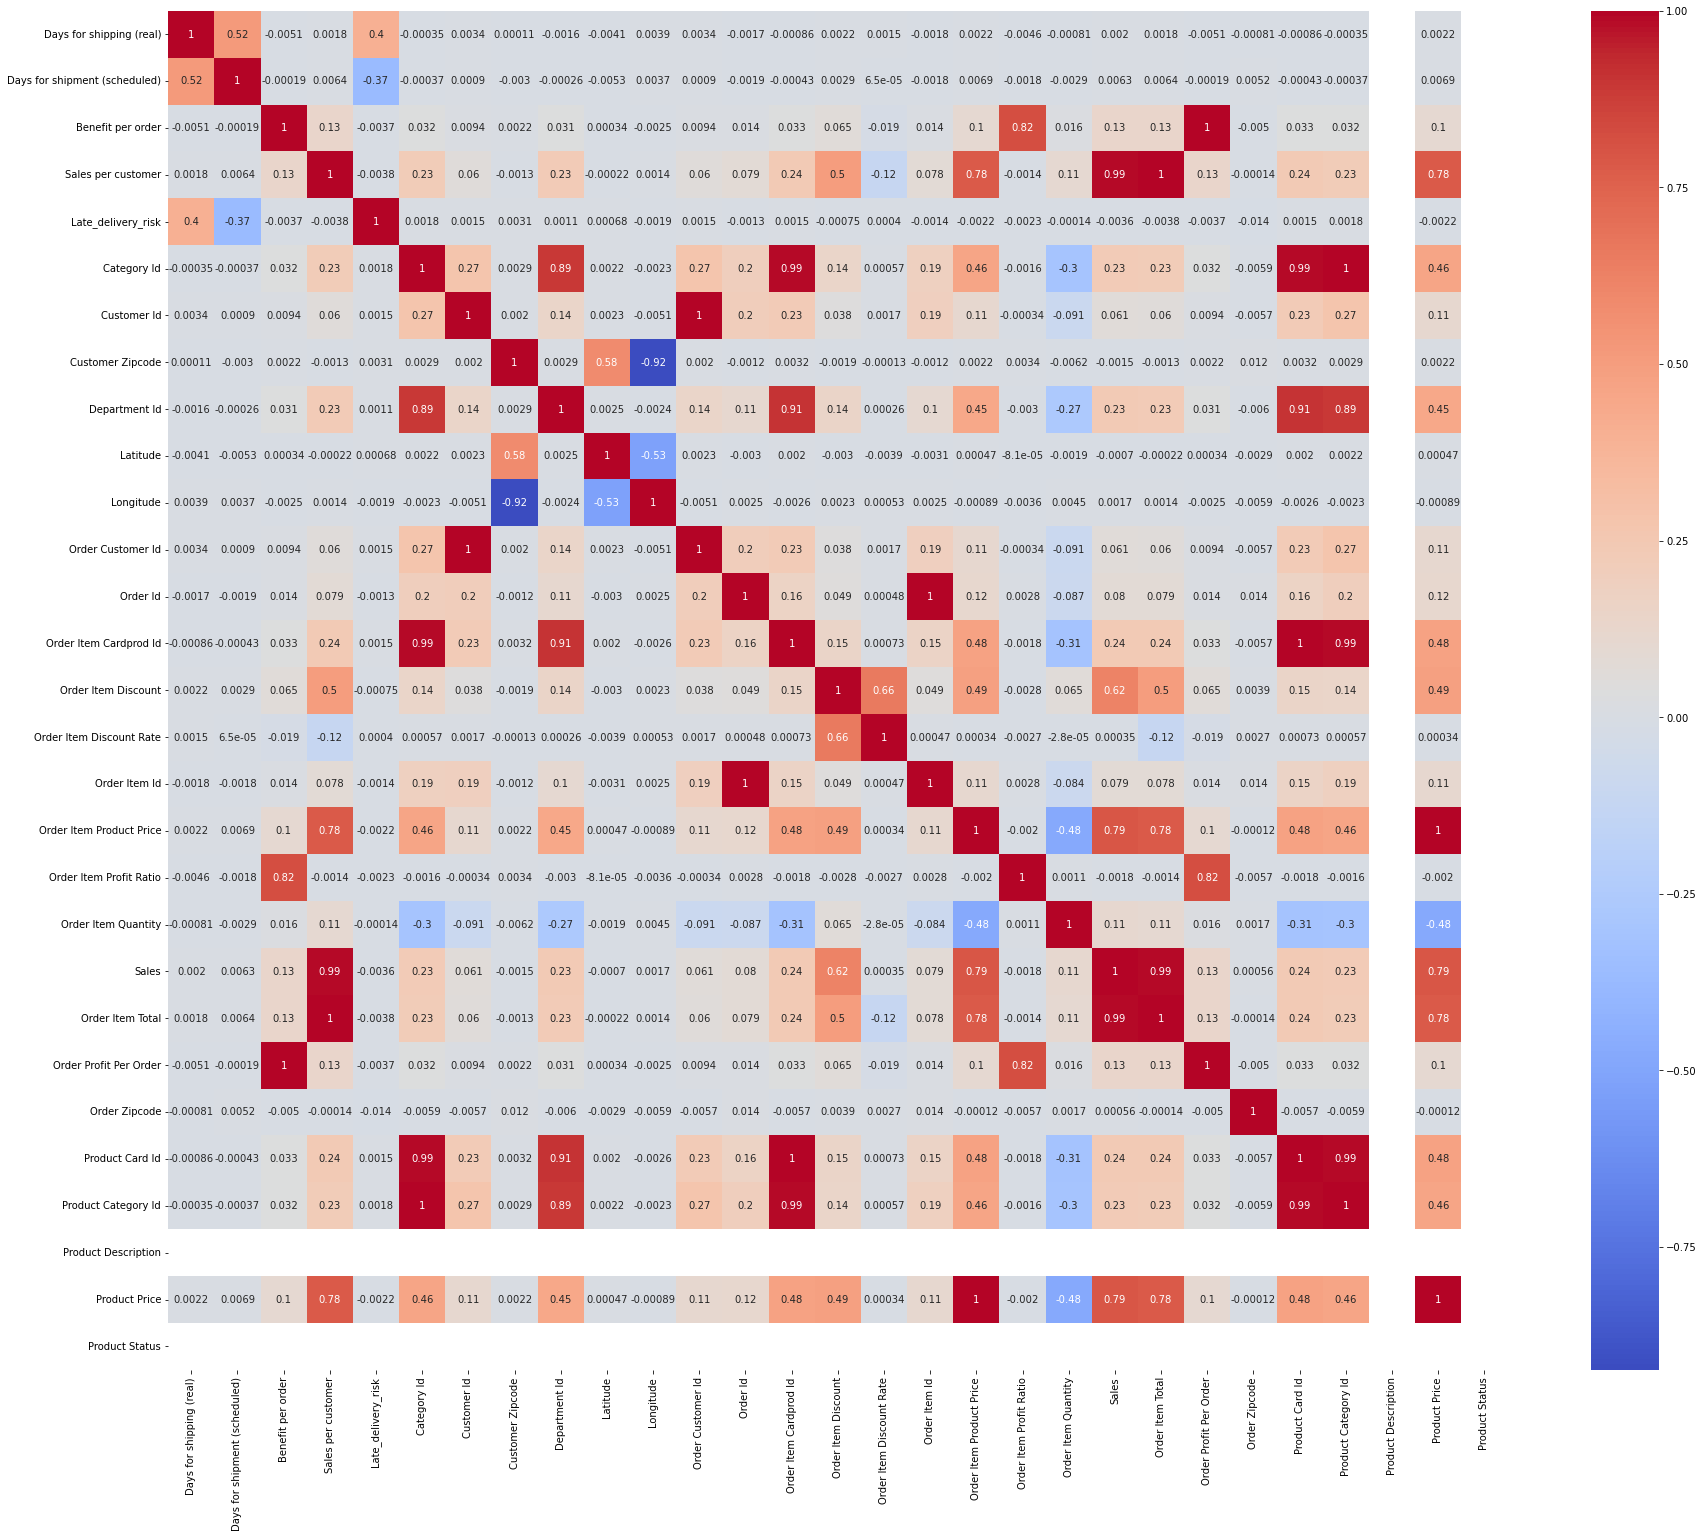

In [84]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

1. Product Status contains only 0 value meaning all products are active
2. Product Description needs to be removed as it is a blank column

In [85]:
df.drop(['Product Status', 'Product Description'], axis=1, inplace=True)

3. The columns Customer Email & Customer Password contain ecrypted data so not very useful columns hence needs to be removed

In [86]:
df.drop(['Customer Password', 'Customer Email'], axis=1, inplace=True)

4. The columns Product Image also needs to be dropped as it contains URL links to the image of the prodcut which is not very useful for our analysis
5. The Column Order Zipcode contains more than 86% missing values hence it needs to be dropped

In [87]:
df.drop(['Order Zipcode', 'Product Image'], axis=1, inplace=True)

In [88]:
df.shape

(180519, 47)

6. From the correlation matrix we can see that the following columns have strong correlation of 1 so we need to check if any of the values are getting duplicated any one of these column pairs
 - Product Category Id & Category Id
 - Product Price & Order Item Product Price
 - Product Card Id & Order Item Cardprod Id
 - Order Profit Per Order & Benefit Per Order
 - Sales Per Customer & Order Item Total
 - Order Item Id & Order Id
 - Order Customer Id & Customer Id

In [89]:
a = (df['Product Category Id'] - df['Category Id'])

In [90]:
a[a>0] ^ a[a<0]

Series([], dtype: int64)

In [91]:
b = (df['Product Price'] - df['Order Item Product Price'])

In [92]:
b[b>0] ^ b[b<0]

Series([], dtype: bool)

In [93]:
c = (df['Product Card Id'] - df['Order Item Cardprod Id'])

In [94]:
c[c>0] ^ c[c<0]

Series([], dtype: int64)

In [95]:
d = (df['Order Profit Per Order'] - df['Benefit per order'])

In [96]:
d[d>0] ^ d[d<0]

Series([], dtype: bool)

In [97]:
e = (df['Sales per customer'] - df['Order Item Total'])

In [98]:
e[e>0] ^ e[e<0]

Series([], dtype: bool)

In [99]:
f = (df['Order Item Id'] - df['Order Id'])

In [100]:
f[f>0] ^ f[f<0]

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
30        True
31        True
32        True
33        True
34        True
35        True
36        True
37        True
38        True
39        True
40        True
41        True
42        True
43        True
44        True
45        True
46        True
47        True
48        True
49        True
50        True
51        True
52        True
53        True
54        True
55        True
56        True
57        True
58        True
59        True
60        True
61        True
62        True
63        True
64        True
65        True
66        

In [101]:
g = (df['Order Customer Id'] - df['Customer Id'])

In [102]:
g[g>0] ^ g[g<0]

Series([], dtype: int64)

From above analysis we can see that the Order Id & Order Item Id are not same and hence we cannot delete any one of them
while for the rest we can delete one from the pair

In [103]:
df.drop(['Product Category Id','Order Item Product Price', 'Order Item Cardprod Id', 'Order Profit Per Order', 
         'Sales per customer', 'Order Customer Id'], axis=1, inplace=True)

In [104]:
df.shape

(180519, 41)

In [105]:
df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order   Delivery Status  Late_delivery_risk  Category Id  \
0          91.250000  Advance shipping                   0           73   
1        -249.089996     Late delivery                   1           73   
2        -247.779999  Shipping on time                   0           73   
3          22.860001  Advance shipping                   0           73   
4         134.210007  Advance shipping                   0           73   

    Category Name Customer City Customer Country Customer Fname  Customer Id  \
0  Sporting Goods        Caguas      Puerto Rico          Cally        20755   
1  Sporting Goods        Caguas      Puerto Rico          Irene        19492   
2  Sporting Goods      San Jose          EE. UU.        Gillian        19491   
3  Sporting Goods   Los Angeles          EE. UU.           Tana        19490   
4  Sporting Goods        Caguas      Puerto Rico           Orli        19489   

  Customer Lname Customer Segment Customer State           Customer Street  \
0       Holloway         Consumer             PR  5365 Noble Nectar Island   
1           Luna         Consumer             PR          2679 Rustic Loop   
2      Maldonado         Consumer             CA      8510 Round Bear Gate   
3           Tate      Home Office             CA           3200 Amber Bend   
4      Hendricks        Corporate             PR  8671 Iron Anchor Corners   

   Customer Zipcode  Department Id Department Name   Latitude   Longitude  \
0             725.0              2         Fitness  18.251453  -66.037056   
1             725.0              2         Fitness  18.279451  -66.037064   
2           95125.0              2         Fitness  37.292233 -121.881279   
3           90027.0              2         Fitness  34.125946 -118.291016   
4             725.0              2         Fitness  18.253769  -66.037048   

         Market  Order City Order Country order date (DateOrders)  Order Id  \
0  Pacific Asia      Bekasi     Indonesia         1/31/2018 22:56     77202   
1  Pacific Asia     Bikaner         India         1/13/2018 12:27     75939   
2  Pacific Asia     Bikaner         India         1/13/2018 12:06     75938   
3  Pacific Asia  Townsville     Australia         1/13/2018 11:45     75937   
4  Pacific Asia  Townsville     Australia         1/13/2018 11:24     75936   

   Order Item Discount  Order Item Discount Rate  Order Item Id  \
0            13.110000                      0.04         180517   
1            16.389999                      0.05         179254   
2            18.030001                      0.06         179253   
3            22.940001                      0.07         179252   
4            29.500000                      0.09         179251   

   Order Item Profit Ratio  Order Item Quantity   Sales  Order Item Total  \
0                     0.29                    1  327.75        314.640015   
1                    -0.80                    1  327.75        311.359985   
2                    -0.80                    1  327.75        309.720001   
3                     0.08                    1  327.75        304.809998   
4                     0.45                    1  327.75        298.250000   

     Order Region      Order State     Order Status  Product Card Id  \
0  Southeast Asia  Java Occidental         COMPLETE             1360   
1      South Asia         Rajastán          PENDING             1360   
2      South Asia         Rajastán           CLOSED             1360   
3         Oceania       Queensland         COMPLETE             1360   
4        

In [106]:
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(include='object')

In [107]:
df_num.head(1)

Days for shipping (real)  Days for shipment (scheduled)  Benefit per order  \
0                         3                              4              91.25   

   Late_delivery_risk  Category Id  Customer Id  Customer Zipcode  \
0                   0           73        20755             725.0   

   Department Id   Latitude  Longitude  Order Id  Order Item Discount  \
0              2  18.251453 -66.037056     77202                13.11   

   Order Item Discount Rate  Order Item Id  Order Item Profit Ratio  \
0                      0.04         180517                     0.29   

   Order Item Quantity   Sales  Order Item Total  Product Card Id  \
0                    1  327.75        314.640015             1360   

   Product Price  
0         327.75

In [40]:
df['Delivery Status'].unique()

array(['Advance shipping', 'Late delivery', 'Shipping on time',
       'Shipping canceled'], dtype=object)

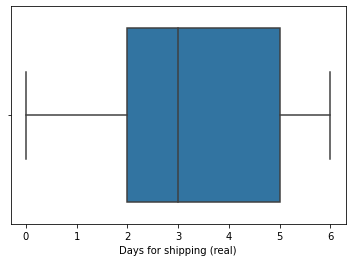

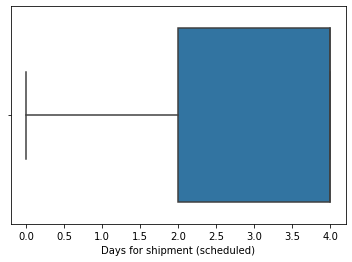

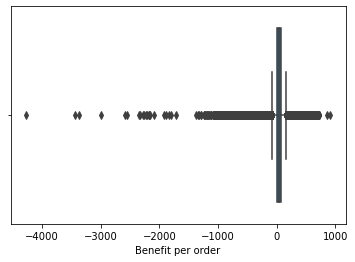

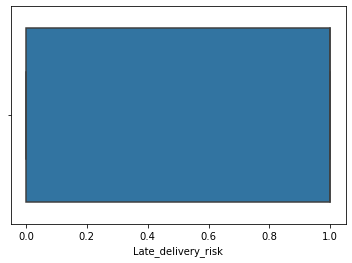

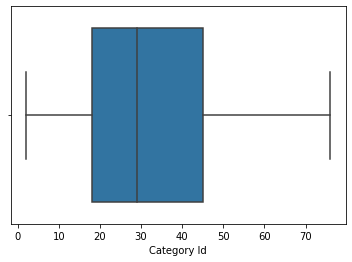

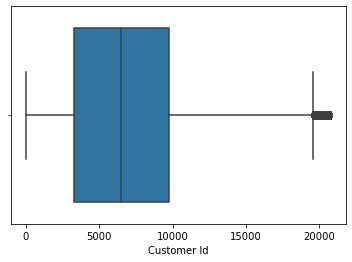

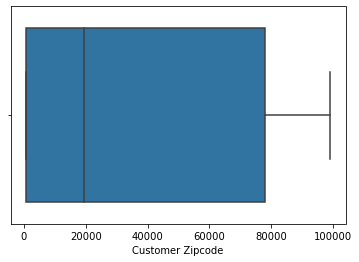

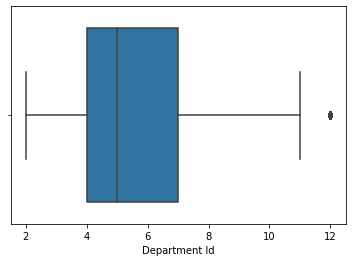

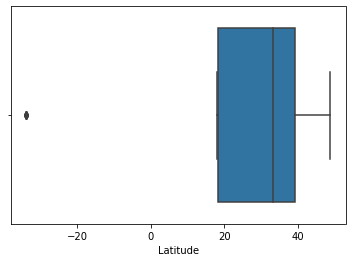

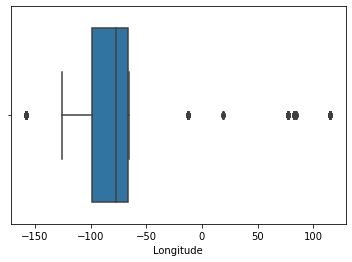

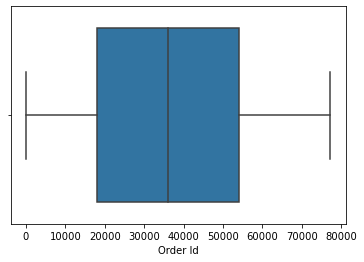

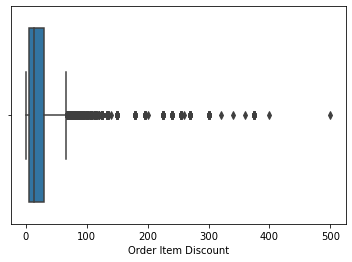

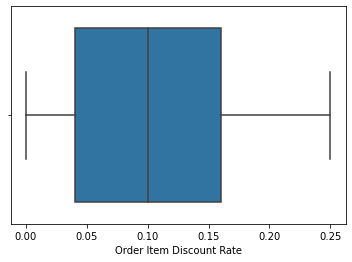

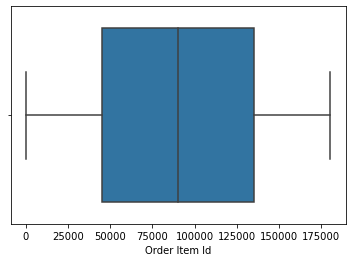

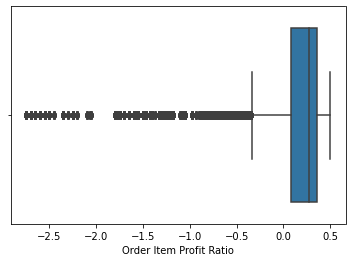

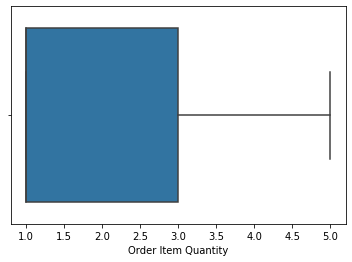

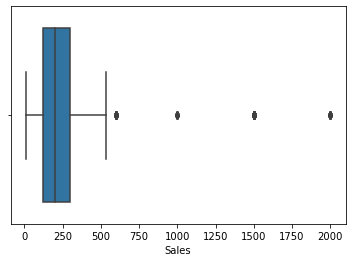

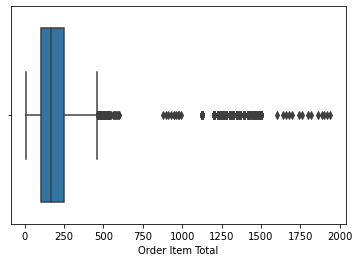

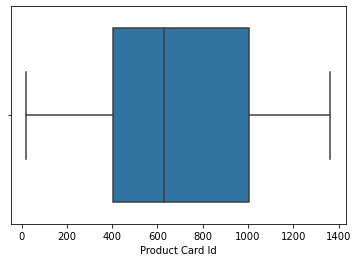

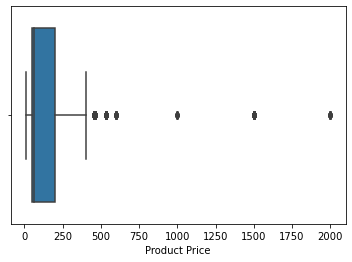

In [117]:
for i in df_num.columns:
    sns.boxplot(data=df, x=i)
    plt.show()

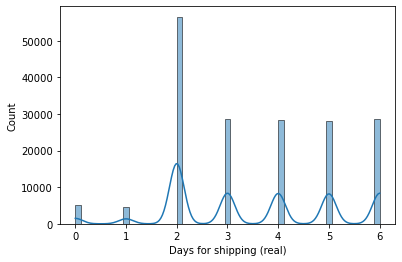

Skewness: 0.08477127299528447
Kurtosis: -1.0079135834813695


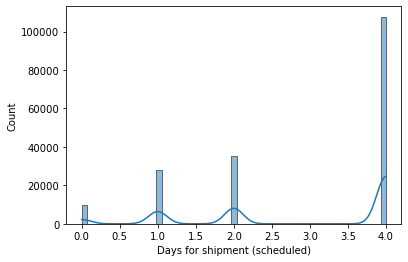

Skewness: -0.7319982842174512
Kurtosis: -1.022948807002554


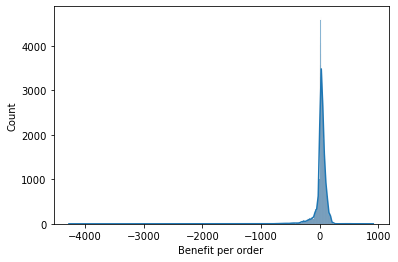

Skewness: -4.741834070263963
Kurtosis: 71.37725865589996


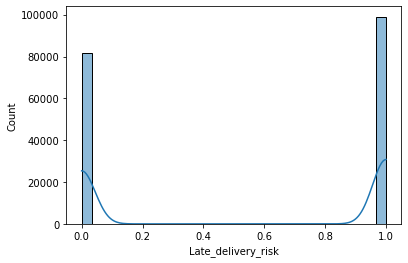

Skewness: -0.19407417010332956
Kurtosis: -1.9623569579002986


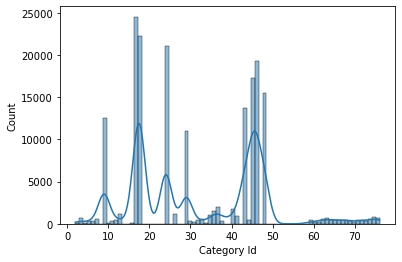

Skewness: 0.36162479939405345
Kurtosis: -0.6032610082781633


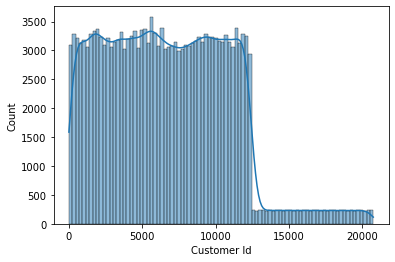

Skewness: 0.4887682515125228
Kurtosis: 0.01489882225969863


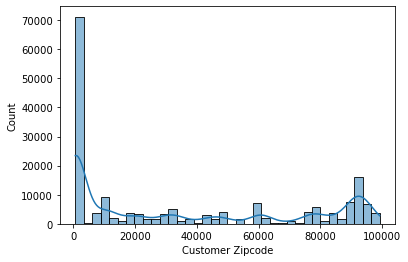

Skewness: 0.4908834095371271
Kurtosis: -1.4514193717743729


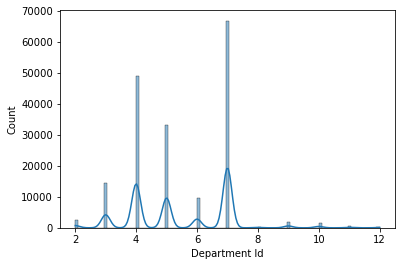

Skewness: 0.27332062913380367
Kurtosis: -0.1816965071010963


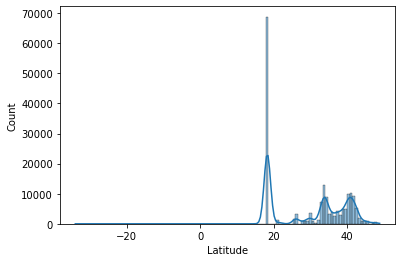

Skewness: -0.09796266622983082
Kurtosis: -1.555414896762957


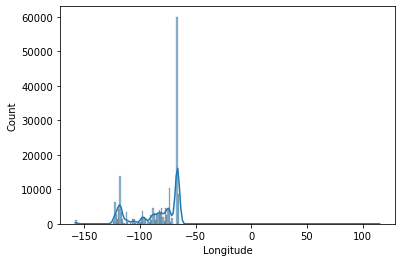

Skewness: -0.49846107256762173
Kurtosis: 2.1809822262082186


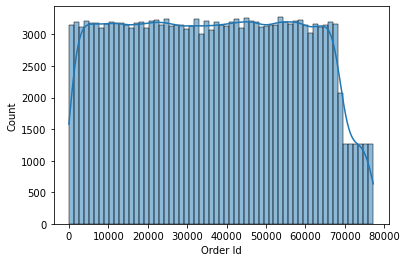

Skewness: 0.03270879463405791
Kurtosis: -1.1529356732614673


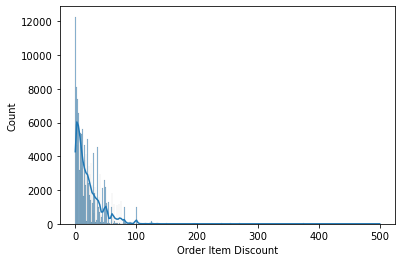

Skewness: 3.0397955138175647
Kurtosis: 25.23126719429707


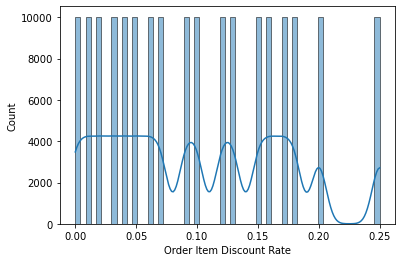

Skewness: 0.34092760117630283
Kurtosis: -0.9011568626673041


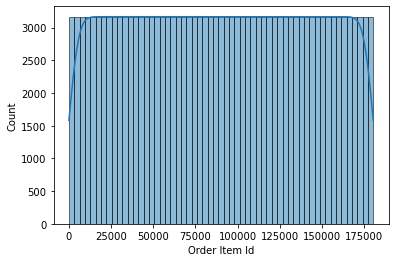

Skewness: 8.45546610224744e-18
Kurtosis: -1.2000000000000002


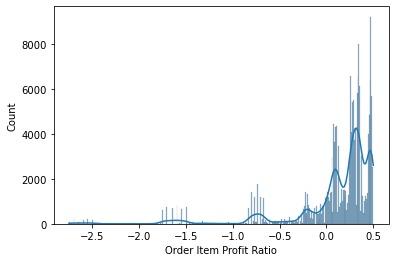

Skewness: -2.8935313411242607
Kurtosis: 10.157224522792497


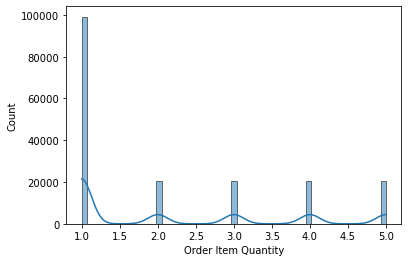

Skewness: 0.8802518478906194
Kurtosis: -0.7537015772317002


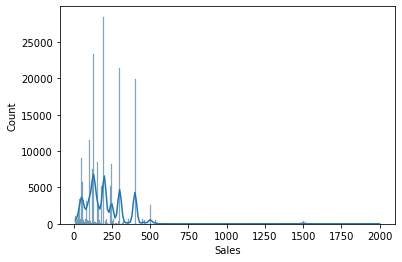

Skewness: 2.8842490487299424
Kurtosis: 23.936561265518982


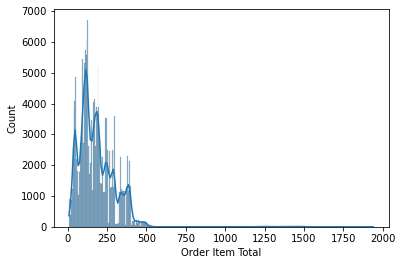

Skewness: 2.888446057030185
Kurtosis: 23.920361513459394


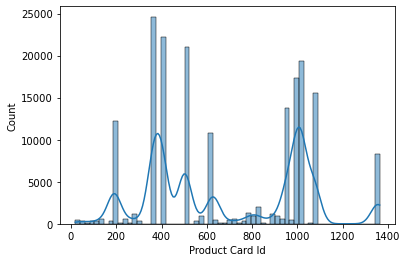

Skewness: 0.1382546099250616
Kurtosis: -1.2674939065869202


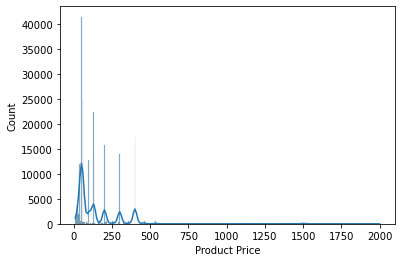

Skewness: 3.191019570200194
Kurtosis: 23.31299748418666


In [118]:
for i in df_num.columns:
    sns.histplot(data=df, x=i, kde=True)
    plt.show()
    print('Skewness:',df[i].skew())
    print('Kurtosis:',df[i].kurt())

In [114]:
for i in df_num.columns:
    print (i, df[i].skew())

Days for shipping (real) 0.08477127299528447
Days for shipment (scheduled) -0.7319982842174512
Benefit per order -4.741834070263963
Late_delivery_risk -0.19407417010332956
Category Id 0.36162479939405345
Customer Id 0.4887682515125228
Customer Zipcode 0.4908834095371271
Department Id 0.27332062913380367
Latitude -0.09796266622983082
Longitude -0.49846107256762173
Order Id 0.03270879463405791
Order Item Discount 3.0397955138175647
Order Item Discount Rate 0.34092760117630283
Order Item Id 8.45546610224744e-18
Order Item Profit Ratio -2.8935313411242607
Order Item Quantity 0.8802518478906194
Sales 2.8842490487299424
Order Item Total 2.888446057030185
Product Card Id 0.1382546099250616
Product Price 3.191019570200194


In [115]:
for i in df_num.columns:
    print (i, df[i].kurt())

Days for shipping (real) -1.0079135834813695
Days for shipment (scheduled) -1.022948807002554
Benefit per order 71.37725865589996
Late_delivery_risk -1.9623569579002986
Category Id -0.6032610082781633
Customer Id 0.01489882225969863
Customer Zipcode -1.4514193717743729
Department Id -0.1816965071010963
Latitude -1.555414896762957
Longitude 2.1809822262082186
Order Id -1.1529356732614673
Order Item Discount 25.23126719429707
Order Item Discount Rate -0.9011568626673041
Order Item Id -1.2000000000000002
Order Item Profit Ratio 10.157224522792497
Order Item Quantity -0.7537015772317002
Sales 23.936561265518982
Order Item Total 23.920361513459394
Product Card Id -1.2674939065869202
Product Price 23.31299748418666


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


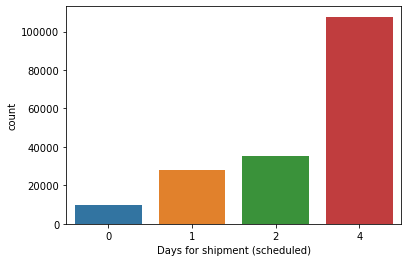

In [120]:
sns.countplot(df['Days for shipment (scheduled)'])
plt.show()

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


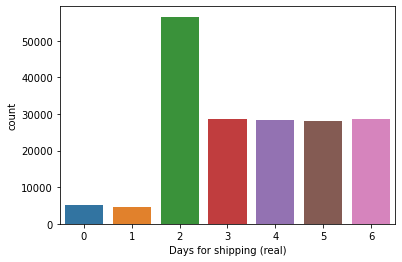

In [121]:
sns.countplot(df['Days for shipping (real)'])
plt.show()